In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pickle
import numpy as np
import tarfile

In [ ]:
import os
tar_file_path = '/content/cifar-10-python.tar.gz'

# Remove the corrupted file if it exists
if os.path.exists(tar_file_path):
    os.remove(tar_file_path)

# Re-download the file
!wget -O /content/cifar-10-python.tar.gz https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz


--2024-12-03 13:29:14--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘/content/cifar-10-python.tar.gz’

/content/cifar-10-p 100%[===================>] 162.60M  41.9MB/s    in 4.2s    

2024-12-03 13:29:18 (38.6 MB/s) - ‘/content/cifar-10-python.tar.gz’ saved [170498071/170498071]



In [ ]:
tar_file_path = '/content/cifar-10-python.tar.gz'

# Extract the file
with tarfile.open(tar_file_path, 'r:gz') as tar:
    tar.extractall(path='/content/cifar-10')

In [ ]:
!ls /content/cifar-10

cifar-10-batches-py


In [ ]:
# Function to load a single CIFAR-10 batch file
def load_cifar10_batch(file_path):
    with open(file_path, 'rb') as file:
        data_dict = pickle.load(file, encoding='bytes')
        data = data_dict[b'data']
        labels = data_dict[b'labels']
        data = data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        return data, np.array(labels)


In [ ]:
# Function to load all 5 CIFAR-10 training batches
def load_all_cifar10_batches(batch_dir):
    data = []
    labels = []

    # Loop over the five batches
    for i in range(1, 6):  # CIFAR-10 has 5 training batches
        batch_file = f'{batch_dir}/data_batch_{i}'  # Format the file name
        batch_data, batch_labels = load_cifar10_batch(batch_file)  # Load each batch

        # Append the data and labels from each batch to lists
        data.append(batch_data)
        labels.append(batch_labels)

    # Concatenate the data and labels from all batches into single numpy arrays
    data = np.concatenate(data)
    labels = np.concatenate(labels)

    return data, labels

# Load all batches from the extracted directory
batch_dir = '/content/cifar-10/cifar-10-batches-py'  # Path to extracted files
all_images, numeric_labels = load_all_cifar10_batches(batch_dir)

# Print the shape to verify all images have been loaded
print(f"Total images loaded: {all_images.shape[0]}, Image shape: {all_images.shape}")

Total images loaded: 50000, Image shape: (50000, 32, 32, 3)


In [ ]:
#function to get the label names
def load_class_names(batch_dir):
    with open(f'{batch_dir}/batches.meta', 'rb') as f:
        meta_data = pickle.load(f, encoding='bytes')
    return meta_data[b'label_names']  # Get the label names (class names)

#Load the class names from batches.meta
batch_dir = '/content/cifar-10/cifar-10-batches-py'  # Path to extracted files
class_names = load_class_names(batch_dir)

all_labels = [class_names[label] for label in numeric_labels]
all_labels = [label.decode('utf-8') for label in all_labels]

# Print the first 10 class names
print(all_labels[:10])

['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


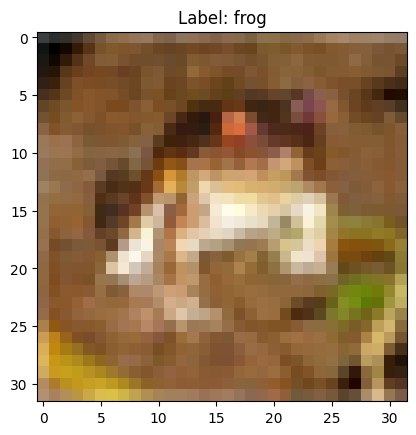

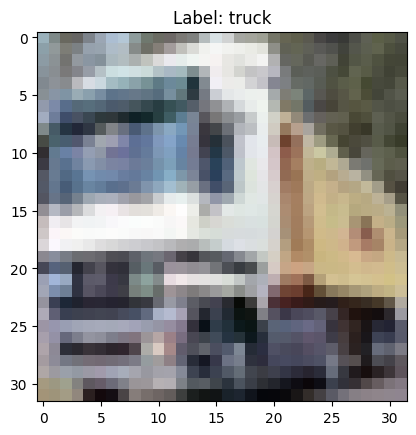

In [ ]:
#checking if the images are loaded correctly
import matplotlib.pyplot as plt

# Function to display a few images with their labels
def display_images(images, labels, num_images=5):
    for i in range(num_images):
        plt.imshow(images[i])  # Show the i-th image
        plt.title(f"Label: {labels[i]}")  # Show the corresponding label
        plt.show()  # Display the image

# Display 5 random images
display_images(all_images, all_labels, num_images=2)

**Preprocessing Data**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
# Function to preprocess CIFAR-10 images
def preprocess_images(images):
    # Convert images to float32 to ensure compatibility with the model
    images = images.astype('float32')

    # Normalize pixel values using ResNet50's preprocess_input function
    normalized_images = preprocess_input(images)

    return normalized_images

# Example: Preprocess your CIFAR-10 images (all_images is your image array from CIFAR-10)
preprocessed_images = preprocess_images(all_images)

# Check the shape of the preprocessed images to ensure they are still (32, 32, 3)
print(preprocessed_images.shape)

(50000, 32, 32, 3)


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
# Load ResNet50 with pre-trained ImageNet weights and modify the input size to (32, 32, 3)
# Set include_top=False to exclude the fully connected layers
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a GlobalAveragePooling2D layer to reduce the spatial dimensions of the output
x = resnet_model.output
x = layers.GlobalAveragePooling2D()(x)

# You can add a Dense layer if needed to fine-tune the model
# For example, adding a dense layer for classification (if required)
# x = layers.Dense(256, activation='relu')(x)

# Build the modified model
model = models.Model(inputs=resnet_model.input, outputs=x)

# View the model architecture (optional)
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

**Feature Extraction Using ResNet50**

In [ ]:
# Function to extract features from images using ResNet50
def extract_features(model, preprocessed_images):

    # Use the model to predict and extract features for all images
    # Features will be extracted from the layer just before the final classification
    features = model.predict(preprocessed_images)

    # Optional: Flatten the features if required for clustering
    features_flat = features.reshape(features.shape[0], -1)  # Reshaping to (num_samples, feature_vector)

    return features_flat
# Extract features from the preprocessed CIFAR-10 images
extracted_features = extract_features(model, preprocessed_images)

# Check the shape of the extracted features (should be something like [50000, 2048] depending on your model layers)
print(extracted_features.shape)

# Save the extracted features for later use
np.save('extracted_features.npy', extracted_features)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 246s 156ms/step
(50000, 2048)


In [ ]:
# Check the features for the first 5 images
print("Features for the first 5 images:")
print(extracted_features[:5])


Features for the first 5 images:
[[0.         1.0309241  0.42131233 ... 0.         1.296532   0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.16170828 0.         1.2578901  ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


**Apply t-SNE for Dimensionality Reduction**  
t-distributed Stochastic Neighbor Embedding (t-SNE) is a technique for reducing high-dimensional data to 2D or 3D, where similar data points (in high dimensions) are likely to be close together in the lower-dimensional space. This is useful for visualizing how well the network groups similar species together based on extracted features.

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

# Step: Apply t-SNE for dimensionality reduction to 2D
def apply_tsne(features, n_components=2, perplexity=30, n_iter=1000, random_state=42):
    tsne = TSNE(n_components=n_components, perplexity=perplexity, max_iter=n_iter, random_state=random_state)
    tsne_result = tsne.fit_transform(features)
    return tsne_result

# Apply t-SNE on the extracted features (e.g., using only a subset if computation is slow)
subset_features = extracted_features[:10000]
subset_labels = all_labels[:10000]  #labels of the images

# Applying t-SNE to reduce features to 2D
tsne_2d = apply_tsne(subset_features, n_components=2)

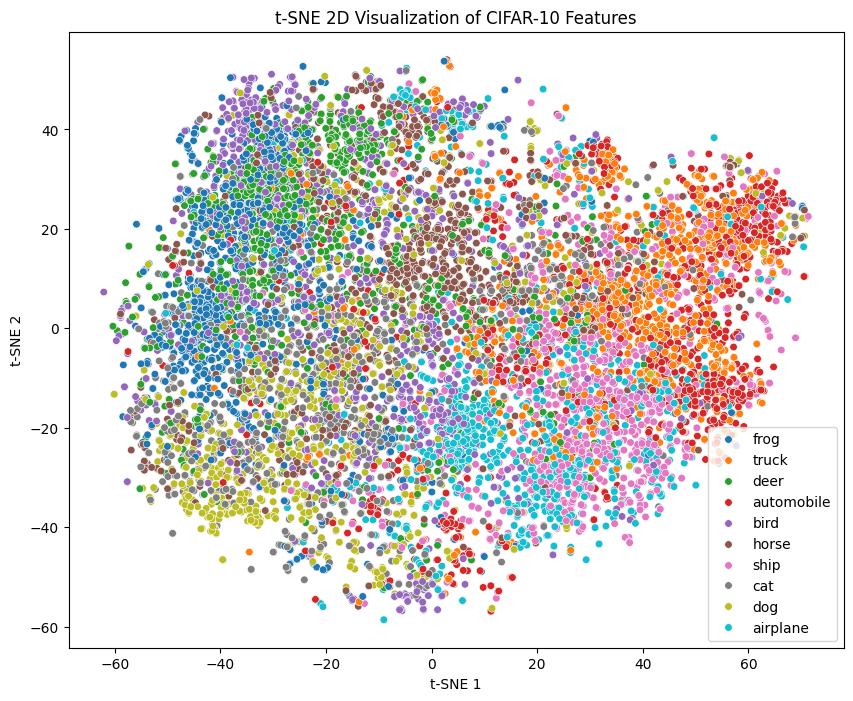

In [ ]:
# Step: Visualize the 2D t-SNE results
def plot_tsne_2d(tsne_result, labels):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1],
                    hue=labels, palette="tab10", s=30)
    plt.title('t-SNE 2D Visualization of CIFAR-10 Features')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.legend(loc='best')
    plt.show()

# Example: Visualize the first 10000 images with their labels
plot_tsne_2d(tsne_2d, subset_labels)

In [ ]:
# Step: Visualize the clusters in 3D (if 3D t-SNE was applied)
# If you applied t-SNE with n_components=3 to reduce to 3D, you can use this function
tsne_3d = apply_tsne(subset_features, n_components=3)

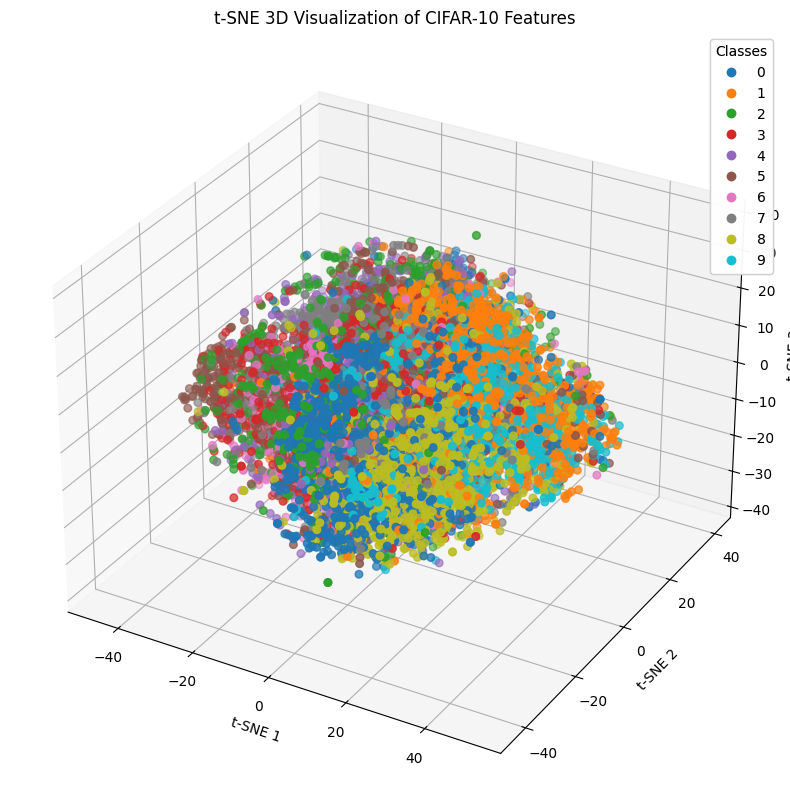

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Step: Function to plot 3D t-SNE results
def plot_tsne_3d(tsne_result, labels):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(tsne_result[:, 0], tsne_result[:, 1],
                         tsne_result[:, 2], c=labels, cmap='tab10', s=30)
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)

    ax.set_title('t-SNE 3D Visualization of CIFAR-10 Features')
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    ax.set_zlabel('t-SNE 3')
    plt.show()

plot_tsne_3d(tsne_3d, numeric_labels[:10000])

**Applying UMAP for Clustering:**

UMAP (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique used to visualize high-dimensional data in lower dimensions (typically 2D or 3D). It works by preserving the local and global structure of data points, making it useful for clustering and visualizing complex datasets.

Key Features of UMAP:
Local and Global Structure: UMAP focuses on both local (similar points) and global (larger patterns) data structures, making it good for exploring datasets where these patterns matter.
Flexible and Fast: UMAP often outperforms t-SNE in terms of computational speed and scalability, especially with larger datasets.
Parameter Control: It allows customization with parameters like n_neighbors (for the local-global tradeoff) and min_dist (for compactness of clusters).
UMAP is popular in fields like bioinformatics, image processing, and NLP, where it is used for data exploration and clustering in reduced dimensions.






In [ ]:
# Step 1: Install UMAP
!pip install umap-learn

# Step 2: Import the required libraries
import umap

# Step 3: Initialize and fit UMAP on the extracted features
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Fit UMAP on the extracted features (features is the data matrix with feature representations from ResNet50)
umap_embeddings = umap_model.fit_transform(subset_features)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


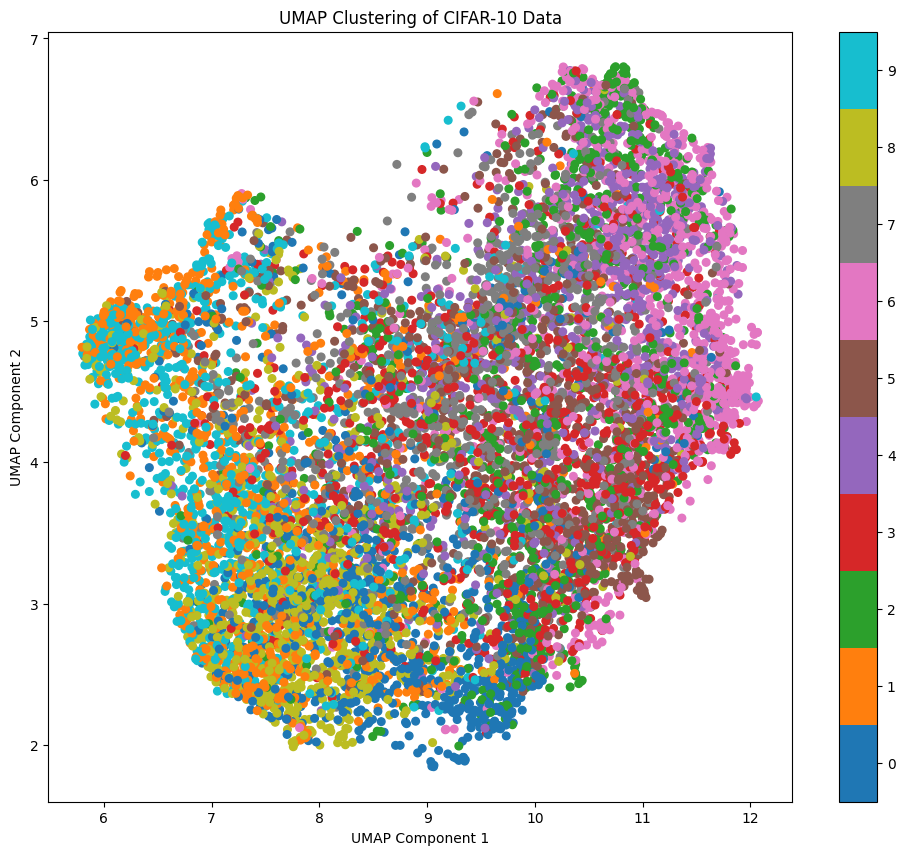

In [ ]:
# Step 4: Visualize the clusters in 2D using matplotlib
# Assuming that 'labels' is a list or array with corresponding CIFAR-10 class labels for the data points
plt.figure(figsize=(12, 10))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1],
            c=numeric_labels[:10000], cmap='tab10', s=30)  # Adjust 's' for point size
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title("UMAP Clustering of CIFAR-10 Data")
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

In [ ]:
# Step 3: Initialize and fit UMAP on the extracted features
#ncomponents 3 for 3D
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, random_state=42)
# Fit UMAP on the extracted features (features is the data matrix with feature representations from ResNet50)
umap_embeddings = umap_model.fit_transform(subset_features)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


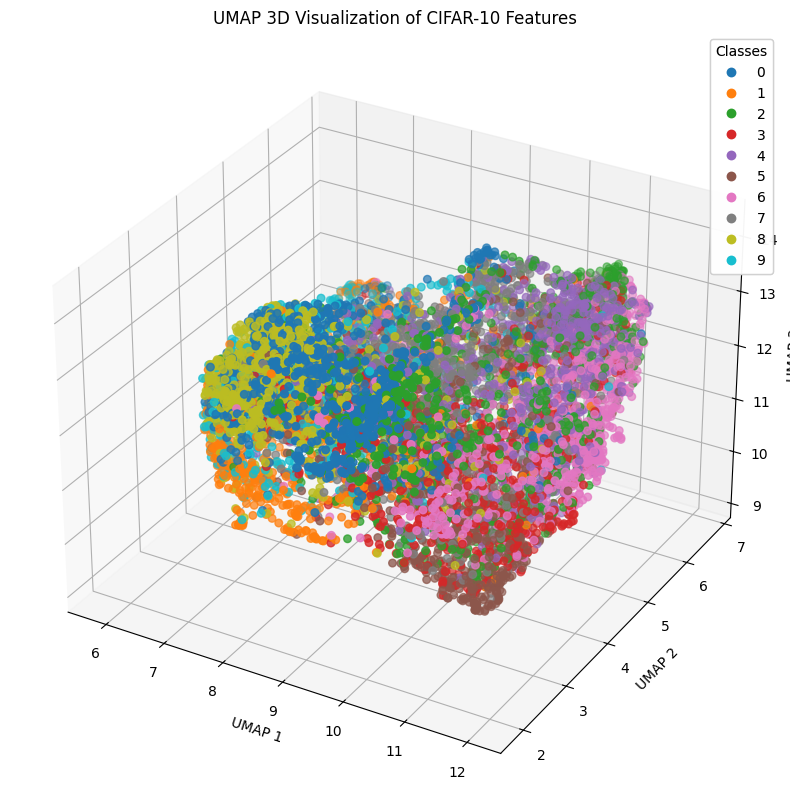

In [ ]:
def plot_umap_3d(umap_result, labels):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Use numeric labels for coloring
    scatter = ax.scatter(umap_result[:, 0], umap_result[:, 1], umap_result[:, 2],
                         c=labels, cmap='tab10', s=30)


    # Creating legend using the actual class names
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)

    ax.set_title('UMAP 3D Visualization of CIFAR-10 Features')
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.set_zlabel('UMAP 3')

    plt.show()

# Use the class names (subset_labels) for the plot
plot_umap_3d(umap_embeddings, numeric_labels[:10000])


**Clustering Techniques Evaluations**

In [ ]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, confusion_matrix
from sklearn.cluster import KMeans

#Apply K-Means Clustering on t-SNE and UMAP results
def apply_kmeans(embeddings, n_clusters=10, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels = kmeans.fit_predict(embeddings)
    return cluster_labels

# Apply K-Means on t-SNE and UMAP embeddings (assuming CIFAR-10 has 10 classes)
tsne_cluster_labels = apply_kmeans(tsne_2d, n_clusters=10)
umap_cluster_labels = apply_kmeans(umap_embeddings, n_clusters=10)

#Calculate NMI and ARI for t-SNE clusters
nmi_tsne = normalized_mutual_info_score(subset_labels, tsne_cluster_labels)
ari_tsne = adjusted_rand_score(subset_labels, tsne_cluster_labels)

#Calculate NMI and ARI for UMAP clusters
nmi_umap = normalized_mutual_info_score(subset_labels, umap_cluster_labels)
ari_umap = adjusted_rand_score(subset_labels, umap_cluster_labels)

print(f"NMI for t-SNE clusters: {nmi_tsne}")
print(f"ARI for t-SNE clusters: {ari_tsne}")
print(f"NMI for UMAP clusters: {nmi_umap}")
print(f"ARI for UMAP clusters: {ari_umap}")

NMI for t-SNE clusters: 0.20712443545945589
ARI for t-SNE clusters: 0.1151657123162546
NMI for UMAP clusters: 0.22491255869931998
ARI for UMAP clusters: 0.13604512852338774


In [ ]:
#retaining original labels of the subset
subset_labels = numeric_labels[:10000]

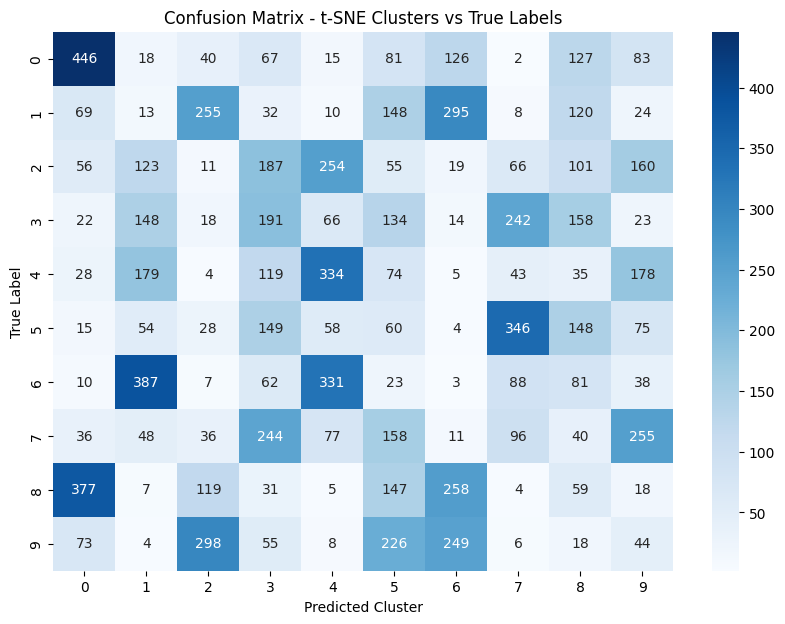

In [ ]:
#Confusion Matrix Visualization for t-SNE clusters
cm_tsne = confusion_matrix(subset_labels, tsne_cluster_labels)

# Plotting the confusion matrix with class names on both axes
plt.figure(figsize=(10,7))
sns.heatmap(cm_tsne, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - t-SNE Clusters vs True Labels')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Label')
plt.show()

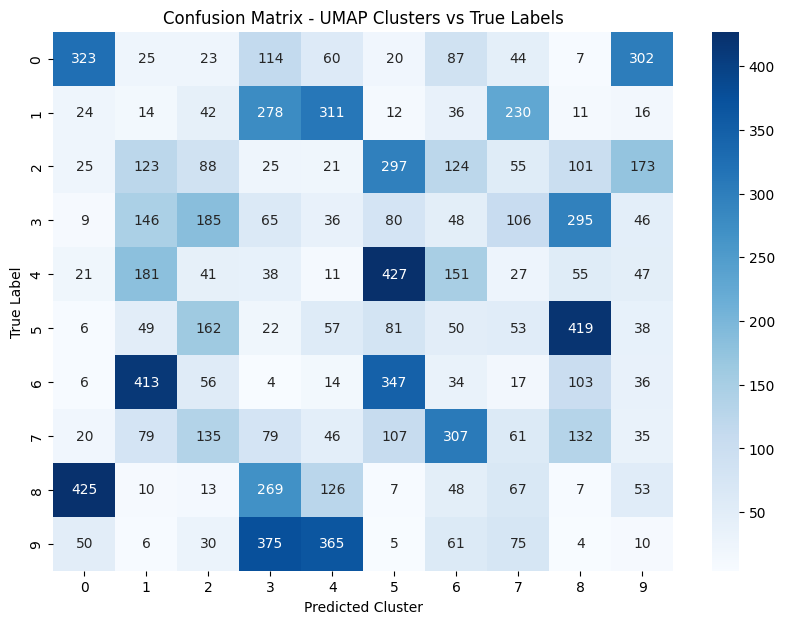

In [ ]:
#Confusion Matrix Visualization for UMAP clusters
cm_umap = confusion_matrix(subset_labels, umap_cluster_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm_umap, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - UMAP Clusters vs True Labels')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Label')
plt.show()